# Explorartory Data Analysis on Scraped Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('LargestCompanies.csv')

In [3]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
# Clean numeric columns
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%','').astype(float)
df['Employees'] = df['Employees'].str.replace(',','').astype(float)

In [76]:
# Extract state for location analysis
df['State'] = df['Headquarters'].str.split(', ').str[-1]

# Split 'Headquarters' into 'City' and 'State'
# df[['City', 'State']] = df['Headquarters'].str.split(', ', expand=True)

# # Drop the original 'Headquarters' column
# df.drop(columns='Headquarters', inplace=True)

# # Preview the updated DataFrame
# df.head()                                                     

In [15]:
# Display first few rows to confirm
df[['Headquarters', 'State']].head(10)

,Headquarters,State
0,"Bentonville, Arkansas",Arkansas
1,"Seattle, Washington",Washington
2,"Cupertino, California",California
3,"Minnetonka, Minnesota",Minnesota
4,"Omaha, Nebraska",Nebraska
5,"Woonsocket, Rhode Island",Rhode Island
6,"Spring, Texas",Texas
7,"Mountain View, California",California
8,"Irving, Texas",Texas
9,"Conshohocken, Pennsylvania",Pennsylvania


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int64  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
 7   State                   100 non-null    object 
 8   Growth in Revenue       100 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 7.2+ KB


 # 1. Top 10 companies by revenue(USD millions)

In [16]:
df.sort_values(by='Revenue (USD millions)', ascending=False).head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State
0,1,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas",Arkansas
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington",Washington
2,3,Apple,Electronics industry,383482.0,-2.8,161000.0,"Cupertino, California",California
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota",Minnesota
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska",Nebraska
5,6,CVS Health,Healthcare,357776.0,10.9,259500.0,"Woonsocket, Rhode Island",Rhode Island
6,7,ExxonMobil,Petroleum industry,344582.0,-16.7,61500.0,"Spring, Texas",Texas
7,8,Alphabet,Technology and cloud computing,307394.0,8.7,182502.0,"Mountain View, California",California
8,9,McKesson Corporation,Health,276711.0,4.8,48000.0,"Irving, Texas",Texas
9,10,Cencora,Pharmacy wholesale,262173.0,9.9,44000.0,"Conshohocken, Pennsylvania",Pennsylvania


# 2. Top 10 companies by Revenue Growth

In [17]:
df.sort_values(by='Revenue growth',ascending=False).head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State
64,65,Nvidia,Technology,60922.0,125.9,29600.0,"Santa Clara, California",California
34,35,Goldman Sachs,Financials,108418.0,57.8,45300.0,"New York City, New York",New York
20,21,Citigroup,Financials,156820.0,55.1,237925.0,"New York City, New York",New York
11,12,JPMorgan Chase,Financial services,239425.0,54.7,309926.0,"New York City, New York",New York
17,18,Bank of America,Financials,171912.0,49.4,212985.0,"Charlotte, North Carolina",North Carolina
40,41,Morgan Stanley,Financials,96194.0,45.9,80006.0,"New York City, New York",New York
33,34,Wells Fargo,Financials,115340.0,39.2,226000.0,"San Francisco, California",California
90,91,Capital One Financial,Financials,49484.0,29.0,51987.0,"Richmond, Virginia",Virginia
61,62,Progressive Corporation,Insurance,62109.0,25.2,61432.0,"Mayfield Village, Ohio",Ohio
35,36,Freddie Mac,Financials,108050.0,24.6,8020.0,"McLean, Virginia",Virginia


# 3. Top 10 by Employees population

In [18]:
df.sort_values(by='Employees',ascending=False).head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State
0,1,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas",Arkansas
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington",Washington
22,23,The Home Depot,Retail,152669.0,-3.0,463100.0,"Atlanta, Georgia",Georgia
45,46,FedEx,Transportation,90155.0,-3.6,446400.0,"Memphis, Tennessee",Tennessee
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota",Minnesota
36,37,Target Corporation,Retail,107412.0,-1.6,415000.0,"Minneapolis, Minnesota",Minnesota
24,25,Kroger,Retail,150039.0,-3.6,414000.0,"Cincinnati, Ohio",Ohio
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska",Nebraska
44,45,United Parcel Service,Transportation,90958.0,-9.3,382550.0,"Atlanta, Georgia",Georgia
79,80,TJX,Retail,49936.0,2.9,329000.0,"Framingham, Massachusetts",Massachusetts


# 4. Company count by industry

In [19]:
df['Industry'].value_counts()

Industry
Financials                             13
Retail                                 10
Petroleum industry                      9
Healthcare                              6
Technology                              6
Pharmaceutical industry                 6
Insurance                               5
Conglomerate                            3
Technology and cloud computing          3
Airline                                 3
Telecommunications                      3
Beverage                                2
Transportation                          2
Aerospace and defense                   2
Financial                               2
Automotive industry                     2
Food processing                         2
Health insurance                        2
Electronics industry                    1
Retail and cloud computing              1
Health                                  1
Automotive and energy                   1
Food industry                           1
Conglomerate and telecomm

# 5. Total revenue by industry

In [21]:
df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False)

Industry
Retail                                 1615484.0
Healthcare                             1324717.0
Financials                             1279132.0
Petroleum industry                     1220316.0
Technology and cloud computing          581169.0
Retail and cloud computing              574785.0
Conglomerate                            501356.0
Pharmaceutical industry                 452210.0
Technology                              442149.0
Electronics industry                    383482.0
Automotive industry                     348033.0
Telecommunications                      310153.0
Health insurance                        301639.0
Health                                  276711.0
Insurance                               272934.0
Pharmacy wholesale                      262173.0
Financial services                      239425.0
Transportation                          181113.0
Airline                                 164553.0
Aerospace and defense                   145365.0
Beverage   

# 6. Average revenue by industry

In [28]:
round(df.groupby('Industry')['Revenue (USD millions)'].mean().sort_values(ascending=False),2)

Industry
Retail and cloud computing             574785.00
Electronics industry                   383482.00
Health                                 276711.00
Pharmacy wholesale                     262173.00
Financial services                     239425.00
Healthcare                             220786.17
Technology and cloud computing         193723.00
Automotive industry                    174016.50
Conglomerate                           167118.67
Retail                                 161548.40
Health insurance                       150819.50
Petroleum industry                     135590.67
Conglomerate and telecommunications    122428.00
Telecommunications                     103384.33
Financials                              98394.77
Automotive and energy                   96773.00
Food industry                           93935.00
Transportation                          90556.50
Media                                   88898.00
Consumer products manufacturing         82006.00
Food servic

In [23]:
# 7.Average revenue growth by industry

In [25]:
round(df.groupby('Industry')['Revenue growth'].mean().sort_values(ascending=False),2)

Industry
Financial services                     54.70
Financials                             24.88
Technology                             19.53
Automotive and energy                  18.80
Agriculture manufacturing              16.50
Airline                                14.03
Financial                              13.60
Machinery                              12.80
Retail and cloud computing             11.90
Health insurance                       11.35
Food service                           11.20
Telecom hardware manufacturing         10.60
Automotive industry                    10.55
Healthcare                             10.38
Pharmacy wholesale                      9.90
Aerospace and defense                   9.60
Apparel                                 9.60
Insurance                               7.74
Media                                   7.50
Beverage                                6.15
Food processing                         6.15
Health                                  4.80
C

In [30]:
# 8. Company count by U.S. state

In [31]:
df['State'].value_counts()


State
Texas             16
New York          15
California         9
Illinois           7
Ohio               6
Virginia           5
Minnesota          4
Georgia            4
Michigan           3
Washington         3
Massachusetts      3
New Jersey         3
Florida            3
Tennessee          2
Pennsylvania       2
Arkansas           2
North Carolina     2
Connecticut        2
Rhode Island       1
Nebraska           1
D.C.               1
Indiana            1
Missouri           1
Idaho              1
Kentucky           1
Maryland           1
Oregon             1
Name: count, dtype: int64

In [32]:
# 9. Revenue vs. Revenue Growth correlation

In [33]:
df[['Revenue (USD millions)', 'Revenue growth']].corr()


,Revenue (USD millions),Revenue growth
Revenue (USD millions),1.000000,0.092598
Revenue growth,0.092598,1.000000


- Correlation = 0.09, which is very weak and close to zero.
- This means there's almost no linear relationship between a company's revenue and its revenue growth.
- So, higher revenue doesn't necessarily mean higher or lower growth.

Interpretation - No strong link between size and growth rate

In [34]:
# 10. Revenue vs. Employees correlation

In [35]:
df[['Revenue (USD millions)', 'Employees']].corr()


,Revenue (USD millions),Employees
Revenue (USD millions),1.000000,0.699229
Employees,0.699229,1.000000


- Correlation = 0.70, which is a strong positive correlation.
- This means that as revenue increases, the number of employees tends to increase too.
- It makes sense — larger companies usually have higher revenue and more staff.
  
Interpretation - Bigger revenue → more employees (generally)

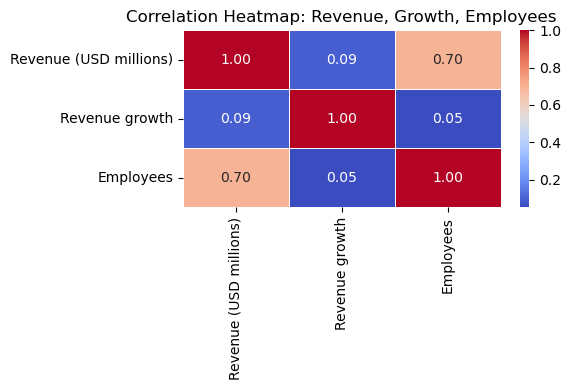

In [36]:
# Compute correlation matrix
corr = df[['Revenue (USD millions)', 'Revenue growth', 'Employees']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Revenue, Growth, Employees")
plt.tight_layout()
plt.show()

C:\Users\aishw\AppData\Local\Temp\ipykernel_25268\2683417284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue (USD millions)', y='Name', data=top_revenue, palette='viridis')


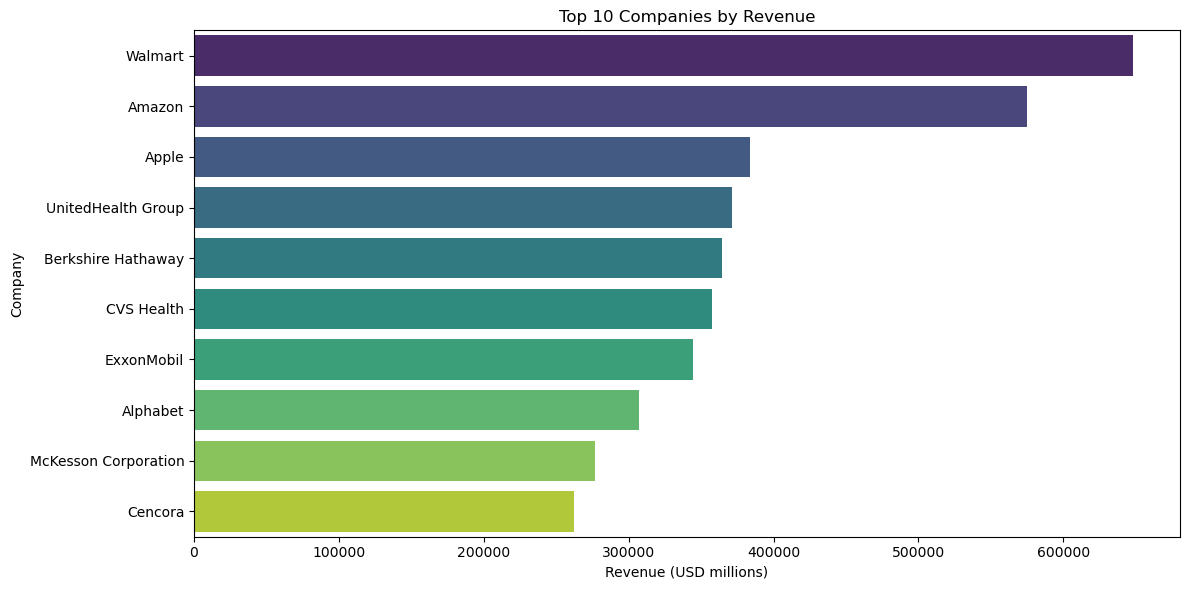

In [37]:
# Bar chart: Top 10 companies by revenue
top_revenue = df.sort_values(by='Revenue (USD millions)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue (USD millions)', y='Name', data=top_revenue, palette='viridis')
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

In [48]:
# create a column to monitor which companies have increased or decreased in revenue
df['Growth in Revenue'] = df['Revenue growth'].apply(lambda x: 'Increase' if x >= 0 else 'Decrease')

In [57]:
# df.drop(columns='Growth Direction', inplace=True)

In [58]:
# Rename Columns for Clarity

# df.rename(columns={
#     'Revenue growth': 'Revenue Growth (%)',
#     'Revenue (USD millions)': 'Revenue (in Millions USD)'
# }, inplace=True

In [62]:
# Split data
increased_growth = df[df['Revenue growth'] > 0].sort_values(by='Revenue growth', ascending=False)
decreased_growth = df[df['Revenue growth'] < 0].sort_values(by='Revenue growth')

In [63]:
increased_growth

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State,Growth in Revenue
64,65,Nvidia,Technology,60922.0,125.9,29600.0,"Santa Clara, California",California,Increase
34,35,Goldman Sachs,Financials,108418.0,57.8,45300.0,"New York City, New York",New York,Increase
20,21,Citigroup,Financials,156820.0,55.1,237925.0,"New York City, New York",New York,Increase
11,12,JPMorgan Chase,Financial services,239425.0,54.7,309926.0,"New York City, New York",New York,Increase
17,18,Bank of America,Financials,171912.0,49.4,212985.0,"Charlotte, North Carolina",North Carolina,Increase
...,...,...,...,...,...,...,...,...,...
31,32,AT&T,Conglomerate and telecommunications,122428.0,1.4,150470.0,"Dallas, Texas",Texas,Increase
66,67,Merck & Co.,Pharmaceutical industry,60115.0,1.4,71000.0,"Kenilworth, New Jersey",New Jersey,Increase
75,76,Charter Communications,Telecommunications,54607.0,1.1,101100.0,"Stamford, Connecticut",Connecticut,Increase
41,42,Johnson & Johnson,Pharmaceutical industry,95195.0,0.3,131900.0,"New Brunswick, New Jersey",New Jersey,Increase


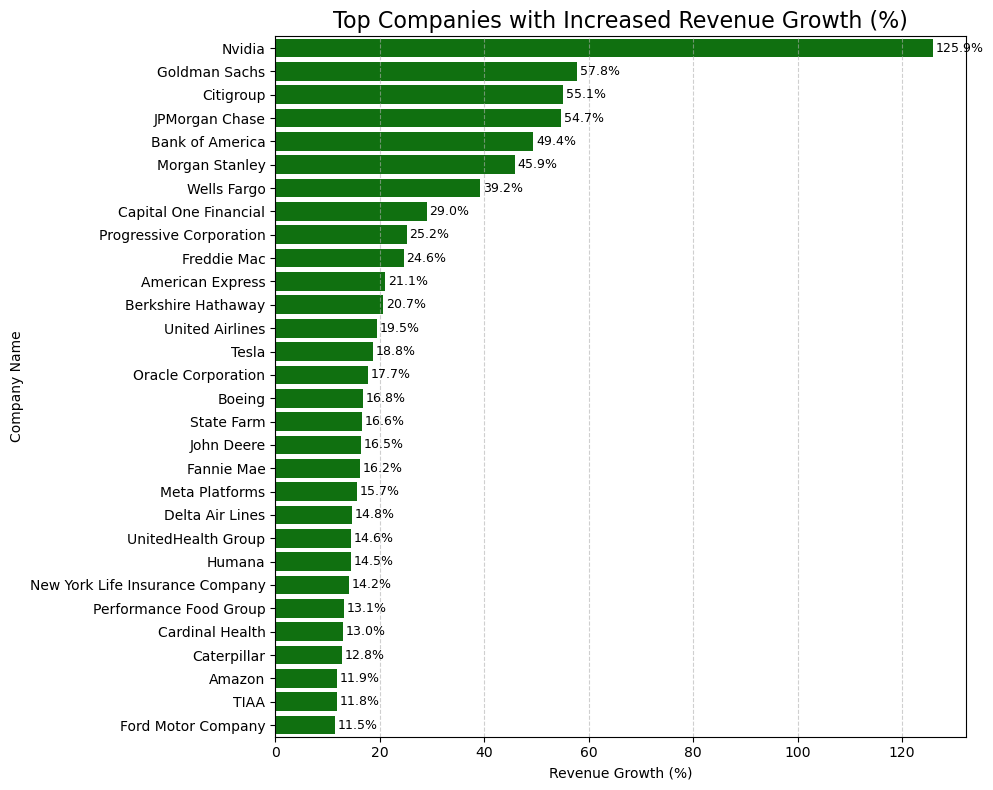

In [70]:
# Plot Increased Revenue Growth Chart

# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Revenue growth',
    y='Name',
    data=increased_growth.head(30),
    color='green'
)

plt.title('Top Companies with Increased Revenue Growth (%)', fontsize=16)
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Company Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add value labels
for index, value in enumerate(increased_growth.head(30)['Revenue growth']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()

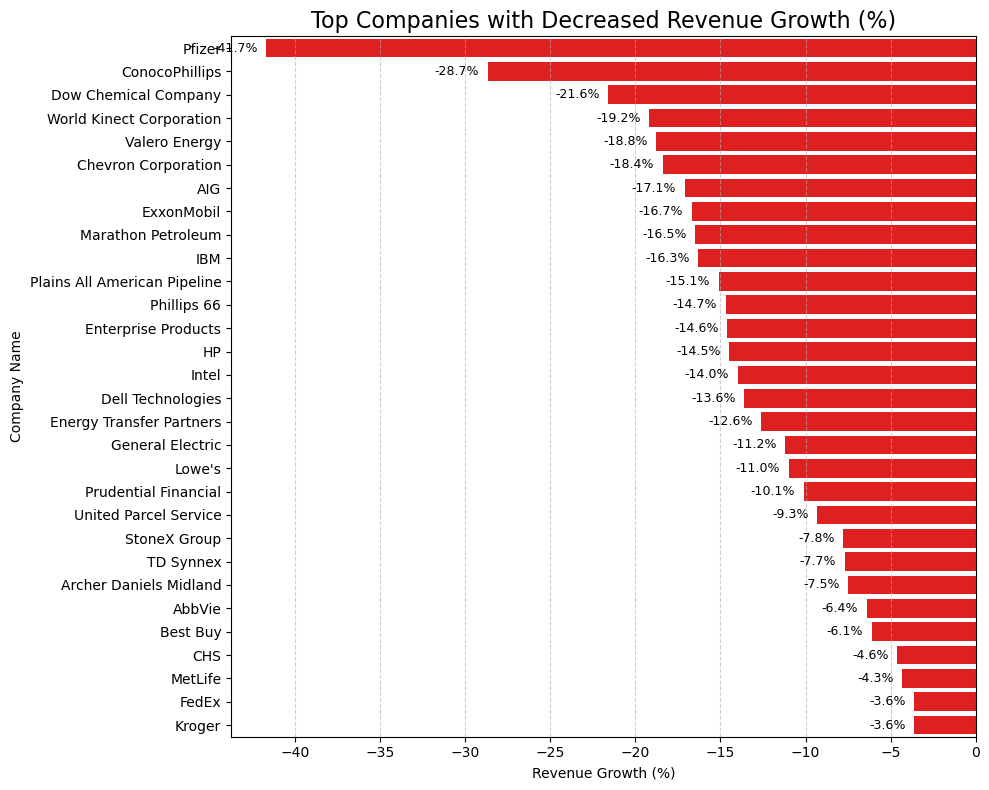

In [71]:
# Plot Decreased Revenue Growth Chart

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Revenue growth',
    y='Name',
    data=decreased_growth.head(30),
    color='red'
)

plt.title('Top Companies with Decreased Revenue Growth (%)', fontsize=16)
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Company Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add value labels
for index, value in enumerate(decreased_growth.head(30)['Revenue growth']):
    plt.text(value - 0.5, index, f"{value:.1f}%", va='center', ha='right', fontsize=9)


plt.tight_layout()
plt.show()

In [72]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,State,Growth in Revenue
0,1,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas",Arkansas,Increase
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington",Washington,Increase
2,3,Apple,Electronics industry,383482.0,-2.8,161000.0,"Cupertino, California",California,Decrease
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota",Minnesota,Increase
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska",Nebraska,Increase
...,...,...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735.0,11.8,16023.0,"New York City, New York",New York,Increase
96,97,CHS,Agriculture cooperative,45590.0,-4.6,10609.0,"Inver Grove Heights, Minnesota",Minnesota,Decrease
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5,34100.0,"New York City, New York",New York,Decrease
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6,35900.0,"Midland, Michigan",Michigan,Decrease
